In [1]:
import networkx as nx
import streamlit as st
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [3]:
%%time
def load_data():
    """
    Loads data into the app.
    :return: reversed DiGraph and undirected DiGraph
    """

    csv_file = "../food_webs/03_metaweb_restrained_conservative.csv"

    # Read the CSV file using pandas with low_memory=False
    edge_data_df = pd.read_csv(csv_file, low_memory=False)

    # Convert the dataframe to a graph
    G = nx.from_pandas_edgelist(edge_data_df, source='Source_Name', target='Target_Name', edge_attr=True, create_using=nx.DiGraph())

    undirected_G = G.to_undirected()

    return nx.reverse(G), undirected_G

G, undirected_G = load_data()

CPU times: user 21.1 s, sys: 803 ms, total: 21.9 s
Wall time: 22 s


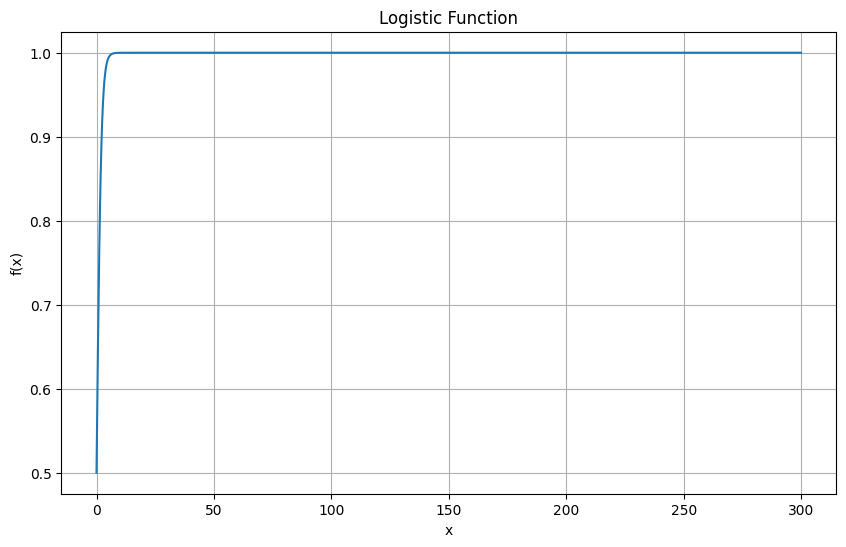

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def logistic_function(x):
    return 1 / (1 + np.exp(-x))

# Generate an array of x values from 0 to 300
x_values = np.linspace(0, 300, 1000)

# Apply the logistic function to each x value
y_values = logistic_function(x_values)

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(x_values, y_values)
plt.title('Logistic Function')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True)
plt.show()

In [2]:
def global_clustering_coefficient(local_clustering_dict):
    local_scores = list(local_clustering_dict.values())
    gcc = np.average(local_scores)
    # Save to session state
    return gcc


def apex_predators(graph):
    apex_species = sorted({n for n, d in graph.out_degree() if d == 0})
    return apex_species


def basal_species(graph):
    basal_species = sorted({k for k, d in graph.in_degree() if d == 0})
    return basal_species


def cannibal_species(graph):
    cannibal_species = sorted(node for node in nx.nodes_with_selfloops(graph))
    return cannibal_species


def average_shortest_path_length(shortest_paths_dict):
    averages = {node: np.mean(list(paths.values())) for node, paths in
                shortest_paths_dict.items()}
    return averages


def eccentricity(shortest_paths_dict):
    ecc = {node: np.max(list(paths.values())) for node, paths in
           shortest_paths_dict.items()}
    return ecc


def diameter(shortest_paths_dict):
    diameter = np.max([max(paths.values()) for paths in
                       shortest_paths_dict.values()])
    return diameter


# TODO: function is broken
def radius(shortest_paths_dict):
    ecc = {node: np.max(list(paths.values())) for node, paths in
           shortest_paths_dict.items()}
    radius = np.min(ecc)
    return radius


def periphery(shortest_paths_dict):

    # Calculate the eccentricity of each node
    eccentricities = {node: max(paths.values()) for node, paths in shortest_paths_dict.items()}

    # Calculate the diameter of the graph
    diameter = max(eccentricities.values())

    # Identify the periphery nodes (those with eccentricity equal to the diameter)
    periphery_nodes = {node: ecc for node, ecc in eccentricities.items() if ecc == diameter}

    return periphery_nodes


def center(shortest_paths_dict):

    # Calculate the eccentricity of each node
    eccentricities = {node: max(paths.values()) for node, paths in shortest_paths_dict.items()}
    eccentricities = {node: ecc for node, ecc in eccentricities.items() if ecc > 0}

    # Calculate the diameter of the graph
    radius = min(eccentricities.values())

    # Identify the periphery nodes (those with eccentricity equal to the diameter)
    center_nodes = {node: ecc for node, ecc in eccentricities.items() if ecc == radius}

    return center_nodes


def k_core():
    return 1


def find_cliques():
    return dict(nx.find_cliques(st.session_state.undirected_G))

# 1. Connectivity

In graph theory, [connectivity](https://en.wikipedia.org/wiki/Connectivity_(graph_theory))
refers to various properties of a graph related to the existence of paths between nodes.

Chapter contents:

- [Density](https://networkx.org/documentation/stable/reference/generated/networkx.classes.function.density.html)
- Graph Components
    - [Weakly Connected Components]((https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.components.weakly_connected_components.html#networkx.algorithms.components.weakly_connected_components))
    - [Strongly Connected Components](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.components.strongly_connected_components.html#networkx.algorithms.components.strongly_connected_components)
- Minimum Cut
    - [Minimum Node Cut]((https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.connectivity.cuts.minimum_node_cut.html))
    - [Minimum Edge Cut](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.connectivity.cuts.minimum_edge_cut.html#networkx.algorithms.connectivity.cuts.minimum_edge_cut)

In [25]:
%%time

density = nx.density(G)
density

CPU times: user 6.04 ms, sys: 115 µs, total: 6.16 ms
Wall time: 6.17 ms


0.0009913526911003547

In [26]:
%%time

weakly_connected_components = list(nx.weakly_connected_components(G))
weakly_connected_components

CPU times: user 40.8 ms, sys: 1.21 ms, total: 42 ms
Wall time: 41 ms


[{'Amsinckia',
  'Meromyza pratorum',
  'Lacerta',
  'Thrips albopilosus',
  'Apatura ilia',
  'Eukiefferiella lobifera',
  'Zebrina detrita',
  'Artemisia umbelliformis',
  'Cacopsylla zetterstedti',
  'Hauptidia distinguenda',
  'Brigittea civica',
  'Agave americana',
  'Valgus hemipterus',
  'Dasineura bistortae',
  'Potentilla anserina',
  'Euophrys frontalis',
  'Gonioctena variabilis',
  'Aglais urticae',
  'Sympecma fusca',
  'Cichorium endivia',
  'Tychius polylineatus',
  'Chrysis cuprea',
  'Aphis fumanae',
  'Heracleum sphondylium',
  'Xerolenta obvia',
  'Kelisia ribauti',
  'Lamiogethes bidens',
  'Coturnix',
  'Sipha elegans',
  'Lestes virens',
  'Discus',
  'Ixobrychus minutus',
  'Leptopodidae',
  'Epuraea silacea',
  'Edwardsiana flavescens',
  'Pogonocherus hispidulus',
  'Nycteola siculana',
  'Lasioglossum nitidulum',
  'Erigonella hiemalis',
  'Phytophagous - bulbs',
  'Orobanche reticulata',
  'Vicia hybrida',
  'Asclepias',
  'Stenodynerus',
  'Otiorhynchus vet

In [11]:
%%time

strongly_connected_components = list(nx.strongly_connected_components(G))
strongly_connected_components

[{'Tinea'},
 {'Clanga clanga'},
 {'Ceratophyllus sciurorum'},
 {'Ischnopsyllus'},
 {'Catharacta skua'},
 {'Nosopsyllus'},
 {'Palaeopsylla minor'},
 {'Ornithomya avicularia'},
 {'Ornithomya chloropus'},
 {'Accipitriformes'},
 {'Threskiornis aethiopicus'},
 {'Icosta ardeae'},
 {'Adela'},
 {'Amphipsylla'},
 {'Amphipsylla sibirica'},
 {'Ctenophthalmus nobilis'},
 {'Frontopsylla'},
 {'Leptopsylla'},
 {'Asio'},
 {'Callopsylla'},
 {'Hystrichopsylla'},
 {'Rhadinopsylla'},
 {'Falconiformes'},
 {'Conops vesicularis'},
 {'Nycteridopsylla eusarca'},
 {'Abax parallelus'},
 {'Basilia italica'},
 {'Basilia nana'},
 {'Chelifer cancroides', 'Reduvius personatus'},
 {'Cimex lectularius'},
 {'Nycteribia kolenatii'},
 {'Basilia nattereri'},
 {'Ornithophila metallica'},
 {'Nycteribia vexata'},
 {'Penicillidia conspicua'},
 {'Penicillidia'},
 {'Penicillidia dufourii'},
 {'Carabus coriaceus'},
 {'Cimex dissimilis'},
 {'Ischnopsyllus simplex'},
 {'Nycteribia pedicularia'},
 {'Crataerina pallida'},
 {'Rhinolop

In [12]:
%%time

minimum_node_cut = nx.minimum_node_cut(G)
minimum_node_cut

NetworkXError: Input graph is not connected

In [19]:
%%time

minimum_edge_cut = nx.minimum_edge_cut(G)
minimum_edge_cut

NetworkXError: Input graph is not connected

In [17]:
%%time

# Get a list of all strongly connected components
sccs = nx.strongly_connected_components(G)

# Find the largest strongly connected component
max_SCC = max(sccs, key=len)

# Create a subgraph of G containing only the nodes in max_SCC
max_SCC_subgraph = G.subgraph(max_SCC)

# Now we can find the minimum node cut of the largest strongly connected component
min_node_cut = nx.minimum_node_cut(max_SCC_subgraph)
min_edge_cut = nx.minimum_edge_cut(max_SCC_subgraph)

node_connectivity = len(min_node_cut)
edge_connectivity = len(min_edge_cut)

print(min_node_cut, min_edge_cut)
print(node_connectivity, edge_connectivity)

KeyboardInterrupt: 

# 2. Centrality

In graph theory, [centrality](https://en.wikipedia.org/wiki/Centrality)
measures quantify the relative importance of nodes in a graph.

Chapter contents:
- degree centrality
    - [in-degree](https://networkx.org/documentation/stable/reference/classes/generated/networkx.DiGraph.in_degree.html)
    - [out-degree](https://networkx.org/documentation/stable/reference/classes/generated/networkx.DiGraph.out_degree.html)
    - [degree](https://networkx.org/documentation/stable/reference/classes/generated/networkx.Graph.degree.html)
- betweenness centrality
    - [node betweenness centrality](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.centrality.betweenness_centrality.html#networkx.algorithms.centrality.betweenness_centrality)
    - [edge betweenness centrality](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.centrality.betweenness_centrality.html#networkx.algorithms.centrality.betweenness_centrality)
- closeness centrality
    - [inward closeness centrality](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.centrality.closeness_centrality.html#networkx.algorithms.centrality.closeness_centrality)
    - [outward closeness centrality](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.centrality.closeness_centrality.html#networkx.algorithms.centrality.closeness_centrality)
- [pagerank](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.link_analysis.pagerank_alg.pagerank.html)

In [20]:
%%time

in_degree = dict(G.in_degree())

{'Araneidae': 51,
 'Chrysopidae': 4,
 'Coccinellidae': 13,
 'Elateridae': 5,
 'Lepidoptera': 92,
 'Orthoptera': 55,
 'Polyphagous- phytophagous bugs': 0,
 'Syrphidae': 69,
 'Thysanoptera': 3,
 'Linyphiidae': 44,
 'Carabidae': 157,
 'Collembola': 1,
 'Diptera': 135,
 'Tipulidae': 12,
 'Lycosidae': 117,
 'Tetragnathidae': 13,
 'Theridiidae': 161,
 'Thomisidae': 142,
 'Abraxas sylvata': 7,
 'Ulmus minor': 0,
 'Abrostola asclepiadis': 2,
 'Berberis vulgaris': 0,
 'Abrostola tripartita': 5,
 'Buddleja davidii': 0,
 'Abrostola triplasia': 5,
 'Acanthopsyche atra': 3,
 'Calluna vulgaris': 0,
 'Taraxacum officinale': 0,
 'Acronicta aceris': 16,
 'Tilia cordata': 0,
 'Acronicta alni': 32,
 'Quercus robur': 0,
 'Rosa canina': 0,
 'Vaccinium uliginosum': 0,
 'Acronicta auricoma': 53,
 'Knautia arvensis': 0,
 'Petasites hybridus': 0,
 'Polygonum bistorta': 0,
 'Populus nigra': 0,
 'Rumex acetosa': 0,
 'Senecio ovatus': 0,
 'Tanacetum vulgare': 0,
 'Vicia cracca': 0,
 'Acronicta euphorbiae': 33,
 '

In [21]:
%%time

out_degree = dict(G.out_degree())

{'Araneidae': 60,
 'Chrysopidae': 49,
 'Coccinellidae': 13,
 'Elateridae': 131,
 'Lepidoptera': 361,
 'Orthoptera': 114,
 'Polyphagous- phytophagous bugs': 6,
 'Syrphidae': 242,
 'Thysanoptera': 10,
 'Linyphiidae': 174,
 'Carabidae': 66,
 'Collembola': 32,
 'Diptera': 280,
 'Tipulidae': 273,
 'Lycosidae': 44,
 'Tetragnathidae': 3,
 'Theridiidae': 78,
 'Thomisidae': 56,
 'Abraxas sylvata': 3,
 'Ulmus minor': 193,
 'Abrostola asclepiadis': 0,
 'Berberis vulgaris': 111,
 'Abrostola tripartita': 2,
 'Buddleja davidii': 310,
 'Abrostola triplasia': 0,
 'Acanthopsyche atra': 0,
 'Calluna vulgaris': 484,
 'Taraxacum officinale': 341,
 'Acronicta aceris': 3,
 'Tilia cordata': 275,
 'Acronicta alni': 4,
 'Quercus robur': 522,
 'Rosa canina': 254,
 'Vaccinium uliginosum': 211,
 'Acronicta auricoma': 1,
 'Knautia arvensis': 307,
 'Petasites hybridus': 102,
 'Polygonum bistorta': 94,
 'Populus nigra': 259,
 'Rumex acetosa': 187,
 'Senecio ovatus': 143,
 'Tanacetum vulgare': 240,
 'Vicia cracca': 3

In [23]:
%%time

degree = dict(G.degree())

{'Araneidae': 111,
 'Chrysopidae': 53,
 'Coccinellidae': 26,
 'Elateridae': 136,
 'Lepidoptera': 453,
 'Orthoptera': 169,
 'Polyphagous- phytophagous bugs': 6,
 'Syrphidae': 311,
 'Thysanoptera': 13,
 'Linyphiidae': 218,
 'Carabidae': 223,
 'Collembola': 33,
 'Diptera': 415,
 'Tipulidae': 285,
 'Lycosidae': 161,
 'Tetragnathidae': 16,
 'Theridiidae': 239,
 'Thomisidae': 198,
 'Abraxas sylvata': 10,
 'Ulmus minor': 193,
 'Abrostola asclepiadis': 2,
 'Berberis vulgaris': 111,
 'Abrostola tripartita': 7,
 'Buddleja davidii': 310,
 'Abrostola triplasia': 5,
 'Acanthopsyche atra': 3,
 'Calluna vulgaris': 484,
 'Taraxacum officinale': 341,
 'Acronicta aceris': 19,
 'Tilia cordata': 275,
 'Acronicta alni': 36,
 'Quercus robur': 522,
 'Rosa canina': 254,
 'Vaccinium uliginosum': 211,
 'Acronicta auricoma': 54,
 'Knautia arvensis': 307,
 'Petasites hybridus': 102,
 'Polygonum bistorta': 94,
 'Populus nigra': 259,
 'Rumex acetosa': 187,
 'Senecio ovatus': 143,
 'Tanacetum vulgare': 240,
 'Vicia 

In [ ]:
# TODO: what about the ratio of degrees

In [24]:
%%time

node_betweenness_centrality = nx.betweenness_centrality(G, normalized=False)
node_betweenness_centrality

CPU times: user 8min 18s, sys: 3.02 s, total: 8min 21s
Wall time: 1h 56s


{'Araneidae': 84564.327626368,
 'Chrysopidae': 11077.090388423861,
 'Coccinellidae': 30022.13530102761,
 'Elateridae': 22117.19649917709,
 'Lepidoptera': 459562.34406362515,
 'Orthoptera': 254979.53893752734,
 'Polyphagous- phytophagous bugs': 0.0,
 'Syrphidae': 158723.01018002068,
 'Thysanoptera': 32443.92855276271,
 'Linyphiidae': 232893.72329784735,
 'Carabidae': 228936.7684786434,
 'Collembola': 52526.79654829255,
 'Diptera': 1763367.568698091,
 'Tipulidae': 28008.64166734213,
 'Lycosidae': 38767.54942932371,
 'Tetragnathidae': 352.6286853470959,
 'Theridiidae': 62844.942908984965,
 'Thomisidae': 114112.23523828467,
 'Abraxas sylvata': 29.71428571428571,
 'Ulmus minor': 0.0,
 'Abrostola asclepiadis': 0.0,
 'Berberis vulgaris': 0.0,
 'Abrostola tripartita': 2.104184704184704,
 'Buddleja davidii': 0.0,
 'Abrostola triplasia': 0.0,
 'Acanthopsyche atra': 0.0,
 'Calluna vulgaris': 0.0,
 'Taraxacum officinale': 0.0,
 'Acronicta aceris': 9.331300080638316,
 'Tilia cordata': 0.0,
 'Acroni

In [ ]:
%%time

edge_betweenness_centrality = nx.edge_betweenness_centrality(G, normalized=False)
edge_betweenness_centrality

In [27]:
%%time

nx.closeness_centrality(G) # outward

CPU times: user 39.1 s, sys: 216 ms, total: 39.4 s
Wall time: 39.4 s


{'Araneidae': 0.11367088322357857,
 'Chrysopidae': 0.0048166544598374625,
 'Coccinellidae': 0.09662366233891274,
 'Elateridae': 0.0913454627565141,
 'Lepidoptera': 0.08545484168800238,
 'Orthoptera': 0.11892634381979256,
 'Polyphagous- phytophagous bugs': 0.0,
 'Syrphidae': 0.0950619707212136,
 'Thysanoptera': 0.09301507813064096,
 'Linyphiidae': 0.1048448385044601,
 'Carabidae': 0.10997586422199229,
 'Collembola': 0.08824087663051372,
 'Diptera': 0.12496133948983065,
 'Tipulidae': 0.09172076125396927,
 'Lycosidae': 0.10990472847540625,
 'Tetragnathidae': 0.10181187696450085,
 'Theridiidae': 0.11240091084210235,
 'Thomisidae': 0.12171397580442554,
 'Abraxas sylvata': 0.0003720238095238095,
 'Ulmus minor': 0.0,
 'Abrostola asclepiadis': 0.00010629251700680272,
 'Berberis vulgaris': 0.0,
 'Abrostola tripartita': 0.0002657312925170068,
 'Buddleja davidii': 0.0,
 'Abrostola triplasia': 0.0002657312925170068,
 'Acanthopsyche atra': 0.00015943877551020407,
 'Calluna vulgaris': 0.0,
 'Taraxac

In [ ]:
%%time

nx.closeness_centrality(nx.reverse(G)) # inward

In [ ]:
%%time

pagerank = nx.pagerank(G)
pagerank

# 3. Paths in Graphs

In graph theory, a [path](https://en.wikipedia.org/wiki/Path_(graph_theory))
is a sequence of non-repeating nodes such that from each of its nodes there is an edge to
the next. Path-related measure provide a sense of the magnitude of a graph, in terms of distances between nodes.

Chapter contents:

- [Shortest Paths](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.shortest_paths.generic.shortest_path_length.html#networkx.algorithms.shortest_paths.generic.shortest_path_length)
- [Average Shortest Path Distribution]()
- [Diameter](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.distance_measures.diameter.html#networkx.algorithms.distance_measures.diameter)
- [Eccentricity](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.distance_measures.eccentricity.html#networkx.algorithms.distance_measures.eccentricity)
- [Radius](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.distance_measures.radius.html#networkx.algorithms.distance_measures.radius)
- [Periphery](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.distance_measures.periphery.html#networkx.algorithms.distance_measures.periphery)
- [Center](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.distance_measures.center.html#networkx.algorithms.distance_measures.center)

NetworkXError: The node Abrostola asclepiadis is not in the digraph.

In [30]:
type(list(G.nodes))

list

'Araneidae'

In [36]:

non_basal

{'Meromyza pratorum',
 'Thrips albopilosus',
 'Apatura ilia',
 'Eukiefferiella lobifera',
 'Zebrina detrita',
 'Cacopsylla zetterstedti',
 'Hauptidia distinguenda',
 'Brigittea civica',
 'Valgus hemipterus',
 'Dasineura bistortae',
 'Hadena clara',
 'Euophrys frontalis',
 'Gonioctena variabilis',
 'Sympecma fusca',
 'Aglais urticae',
 'Chrysis cuprea',
 'Tychius polylineatus',
 'Aphis fumanae',
 'Kelisia ribauti',
 'Xerolenta obvia',
 'Coturnix',
 'Lamiogethes bidens',
 'Sipha elegans',
 'Lestes virens',
 'Ixobrychus minutus',
 'Epuraea silacea',
 'Edwardsiana flavescens',
 'Pogonocherus hispidulus',
 'Lasioglossum nitidulum',
 'Nycteola siculana',
 'Erigonella hiemalis',
 'Otiorhynchus veterator',
 'Sclerophaedon orbicularis',
 'Microdon myrmicae',
 'Eucarta amethystina',
 'Baetis scambus',
 'Anarsia',
 'Pipunculus',
 'Bagous longitarsis',
 'Protaetia marmorata',
 'Chromatomyia gentianae',
 'Cantharis fusca',
 'Argyra auricollis',
 'Lepidostoma hirtum',
 'Erioptera limbata',
 'Melitae